# Testing of second iteration of the LUNA model

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (15, 7)

In [100]:
#data preperation
#tx = pd.read_csv("tx_long.csv")

# Load ALL OF THE DATA
tx = pd.read_csv("./data/data_scales/TX/tx_long.csv") # Changes over time

aist = pd.read_csv("./data/data_scales/T0/aist.csv")
bfi = pd.read_csv("./data/data_scales/T0/bfi.csv")
course1 = pd.read_csv("./data/data_scales/T0/course1.csv")
iq = pd.read_csv("./data/data_scales/T0/iq.csv")
kont = pd.read_csv("./data/data_scales/T0/kont.csv")
motivation = pd.read_csv("./data/data_scales/T0/motivation.csv")
panas = pd.read_csv("./data/data_scales/T0/panas.csv")

t0 = pd.merge(panas, bfi,  on="studentID")\
    .merge(aist, on="studentID") \
    .merge(iq, on="studentID") \
    .merge(kont, on="studentID") \
    .merge(motivation, on="studentID")

pivoted = tx.pivot(index='studentID',columns='meas')

# Should forward fill these I think. Or drop from analysis?
PANN01_state = pivoted['PANN01_state'].T
PANN05_state = pivoted['PANN05_state'].T
PANN09_state = pivoted['PANN09_state'].T



Y1 = PANN01_state.to_numpy()
Y2 = PANN05_state.to_numpy()
Y3 = PANN09_state.to_numpy()
Y = np.stack((Y1,Y2,Y3),axis=2) #axis=0 would lead to (3, 50, 117)
Y = np.transpose(Y,(1,2,0))
Y.shape

# For getting factor loadings we need the dataset filled. 
# Here we interpolate, forwardfill and backfill the remaining values.
# This isn't super clean, but it at least gets it running. Smarter interpolation / calculation of factor loadings can be done later.w
PANN01_state = pivoted['PANN01_state'].interpolate(axis=1).ffill().bfill().T
PANN05_state = pivoted['PANN05_state'].interpolate(axis=1).ffill().bfill().T
PANN09_state = pivoted['PANN09_state'].interpolate(axis=1).ffill().bfill().T

Y1 = PANN01_state.to_numpy()
Y2 = PANN05_state.to_numpy()
Y3 = PANN09_state.to_numpy()
Y_factors = np.stack((Y1,Y2,Y3),axis=2) #axis=0 would lead to (3, 50, 117)
#Y_factors = np.transpose(Y,(1,2,0))
Y_factors.shape


(50, 117, 3)

In [212]:
def get_data(student_idx, to_numpy=True):
    """ Returns concatenated student data (tx + t0) for model input
    """
    student = tx["studentID"][student_idx]
    if to_numpy:
        return tx[tx["studentID"]==student].merge(t0, on="studentID").iloc[:,2:].drop(["Summe","event"], axis=1).interpolate(axis=1).ffill().bfill().to_numpy()
    return tx[tx["studentID"]==student].merge(t0, on="studentID").iloc[:,2:].drop(["Summe","event"], axis=1).interpolate(axis=1).ffill().bfill()
    

In [213]:
get_data(4, to_numpy=False)

,Iv1_state,Av1_state,Uv1_state,Co1_state,Co2_state,Angst_abbruch_state,Angst_scheitern_state,Leist_verstehen_state,Leist_bearbeiten_state,Leist_stress_state,...,aist_e,aist_c,iq,Ikont,Ekont,Av,Iv,Se,Uv,Co
0,3.0,3.0,4.0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
1,3.0,3.0,2.0,2.0,3.0,1.0,2.0,4.0,3.0,2.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
2,3.0,2.0,3.0,2.0,2.0,1.0,2.0,4.0,4.0,2.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
3,4.0,3.0,3.0,2.0,2.0,4.0,4.0,3.0,3.0,4.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
4,3.0,2.0,3.0,3.0,4.0,1.0,2.0,3.0,3.0,3.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
5,2.0,2.0,2.0,3.0,2.0,1.0,2.0,3.0,3.0,3.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
6,2.0,2.0,4.0,2.0,3.0,1.0,2.0,2.0,4.0,3.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
7,2.0,2.0,2.0,4.0,4.0,2.0,4.0,1.0,1.0,4.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
8,2.0,1.0,3.0,4.0,4.0,3.0,4.0,2.0,1.0,4.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0
9,2.0,2.0,3.0,4.0,4.0,2.0,4.0,2.0,2.0,4.0,...,2.2,2.0,116.0,4.5,1.0,2.75,3.5,2.5,3.33,2.0


Final observation vector will be 26 + 22 = 48 (survey + t0)

In [452]:
# Placeholder Factor Loadings
H = np.random.normal(3,7,47).reshape((47,1))
H[23] = 0.04

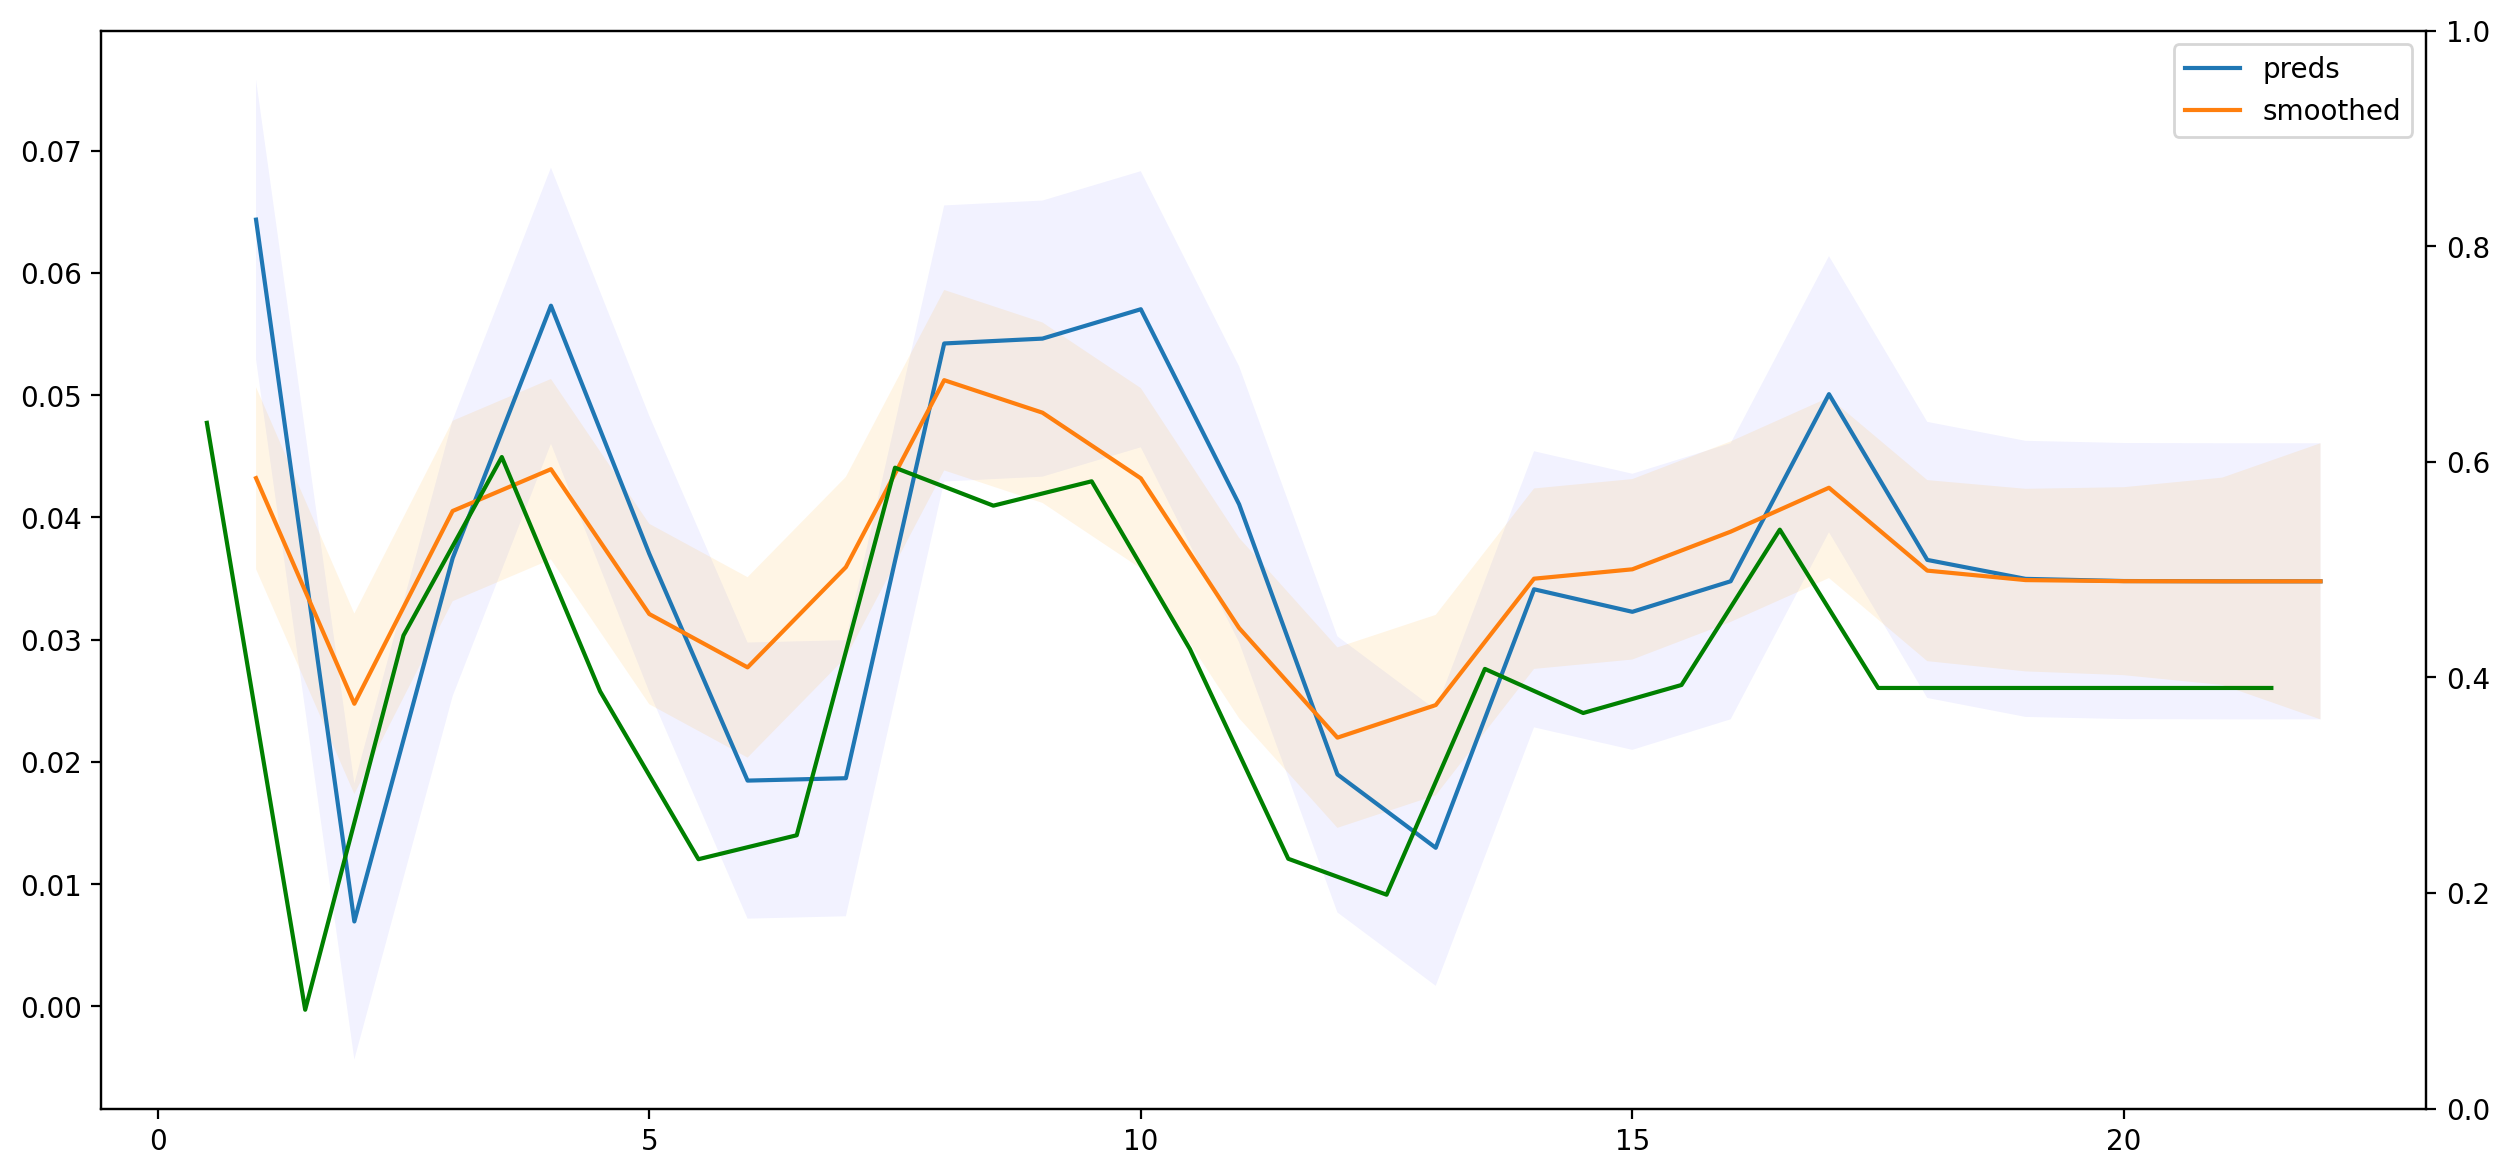

In [529]:
from importlib import reload

import model_settings as MS
import LUNA_Kalman2 as LK
reload(LK)
reload(MS)


LK_model = LK.KalmanFilter(F = MS.F, H = H, Q = MS.Q, R = MS.R, x0 = MS.x0)


# Get from database

#observation = get_data(np.random.randint(117)) #[:,1:4]
observation = get_data(16) #[:,1:4]



pred_state, pred_cov, pred_obs = LK_model.forward(observation)

x_smooth, cov_smooth, _ = LK_model.smooth(np.array(pred_state), np.array(pred_cov))

# Write to DB
raw_state = np.array(pred_state).flatten() # Array of length T+1 (+1 for prediction)
smooth_state = x_smooth.flatten() # Array of length T+1 (+1 for prediction)
pred_cov = np.array(pred_cov).flatten()
cov_smooth = np.array(cov_smooth).flatten()

x = list(range(len(raw_state[:])))

# Not required - just for plotting
measured_state = (observation @ H).flatten()

measured_state = measured_state / (measured_state[0] / smooth_state[0])
fig, ax1 = plt.subplots()

# Plot raw_state
ax1.plot(x[1:], raw_state[1:], label="preds")
ax1.fill_between(x[1:],
                 raw_state[1:] + pred_cov[1:],
                 raw_state[1:] - pred_cov[1:],
                 alpha=0.05,
                 facecolor="blue")

# Plot smooth_state
ax1.plot(x[1:], smooth_state[1:], label="smoothed")
ax1.fill_between(x[1:],
                 smooth_state[1:] + cov_smooth[1:],
                 smooth_state[1:] - cov_smooth[1:],
                 alpha=0.1,
                 facecolor="orange")

# Add legend
ax1.legend()

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot measured_state on secondary y-axis
ax1.plot(np.array(x)+0.5, np.append(measured_state,np.nan), label="measurement", color="green")

# Add legend for secondary y-axis
#ax2.legend(loc="lower right")
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()